## By Tharun Kumar S

In [1]:
#importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#read the dataset from local drive

df = pd.read_csv('train.csv')
df.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,User_Traffic,Competition_Metric,Sales
0,1,1,1,Development,Course,0,1,1,11004,0.007,81
1,2,2,1,Development,Course,0,0,1,13650,0.007,79
2,3,3,1,Development,Course,0,0,1,11655,0.007,75
3,4,4,1,Development,Course,0,0,1,12054,0.007,80
4,5,5,1,Development,Course,0,0,1,6804,0.007,41


In [3]:
df_eval = pd.read_csv('test_TyVG1cP.csv')
df_eval.head()

,ID,Day_No,Course_ID,Course_Domain,Course_Type,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric
0,883,883,1,Development,Course,1,0,1,0.007
1,884,884,1,Development,Course,1,0,1,0.007
2,885,885,1,Development,Course,1,0,1,0.007
3,886,886,1,Development,Course,1,0,1,0.007
4,887,887,1,Development,Course,0,0,1,0.007


In [4]:
copy_df = df.copy()
copy_df_eval = df_eval.copy()

In [5]:
#shape of model dataset & evaluation dataset
df.shape, df_eval.shape

((512087, 11), (36000, 9))

In [6]:
#features and datatypes

df.info()

#all the variables are in their respective datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512087 entries, 0 to 512086
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ID                  512087 non-null  int64  
 1   Day_No              512087 non-null  int64  
 2   Course_ID           512087 non-null  int64  
 3   Course_Domain       512087 non-null  object 
 4   Course_Type         512087 non-null  object 
 5   Short_Promotion     512087 non-null  int64  
 6   Public_Holiday      512087 non-null  int64  
 7   Long_Promotion      512087 non-null  int64  
 8   User_Traffic        512087 non-null  int64  
 9   Competition_Metric  510323 non-null  float64
 10  Sales               512087 non-null  int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 43.0+ MB


In [7]:
#exploring the category of variables

print('Numerical variables : ', df.select_dtypes(include='number').columns)

print('\nCategorical variables : ', df.select_dtypes(exclude='number').columns)

Numerical variables :  Index(['ID', 'Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric', 'Sales'],
      dtype='object')

Categorical variables :  Index(['Course_Domain', 'Course_Type'], dtype='object')


In [8]:
#check for null values
df.isnull().sum()

#there are some null values in Competition_Metric, we will treat the same in later stage

ID                       0
Day_No                   0
Course_ID                0
Course_Domain            0
Course_Type              0
Short_Promotion          0
Public_Holiday           0
Long_Promotion           0
User_Traffic             0
Competition_Metric    1764
Sales                    0
dtype: int64

In [9]:
#check for duplicate values

df.duplicated().value_counts()
#There are no duplicate values

False    512087
dtype: int64

# Exploratory Data Analysis

## * Univariate Analysis

### Target feature - Sales

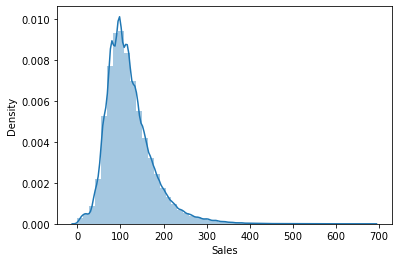

In [10]:
#Lets check the distribution of the Sales variable
sns.distplot(df['Sales'])
plt.show()

In [11]:
#The data is right-skewed, seems it has some outliers present. We can explore it further.

print('Skewness of Sales :', df['Sales'].skew())
print('Kurtosis of Sales :', df['Sales'].kurt())

#Sales variable is Right skewed and Leptokurtic in nature.

Skewness of Sales : 1.374769816079381
Kurtosis of Sales : 3.6095060518605546


In [12]:
#Range of values, min value & Max value

df['Sales'].min(), df['Sales'].max()

(0, 682)

<AxesSubplot:xlabel='Sales'>

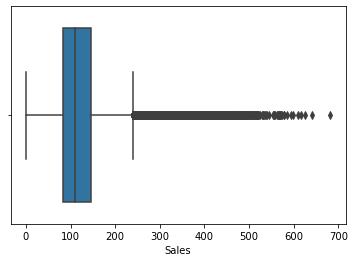

In [13]:
#box plot to check for outliers
sns.boxplot(df['Sales'])

In [14]:
#there is a huge outliers, we can find out the percentage of the outliers
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5 * iqr
ul = q3 + 1.5 * iqr

df[~((df['Sales'] > ll) & (df['Sales'] < ul))].shape

(18707, 11)

In [15]:
18707/512087

#around 3.65% of the data is outlier.

0.03653090197564086

### ID

In [16]:
df['ID'].nunique()

#each and every record has unique value
#ID is a redundant variable and we can drop the variable

512087

In [17]:
df.drop('ID', axis=1, inplace=True)

### Day_No

In [18]:
df['Day_No'].nunique()

#There are around 900 unique values, we can check for significance and proceed

882

In [19]:
df['Day_No'].value_counts()

256    600
150    600
401    600
146    600
402    600
      ... 
650    507
709    507
550    507
580    507
622    507
Name: Day_No, Length: 882, dtype: int64

<AxesSubplot:xlabel='Day_No', ylabel='Density'>

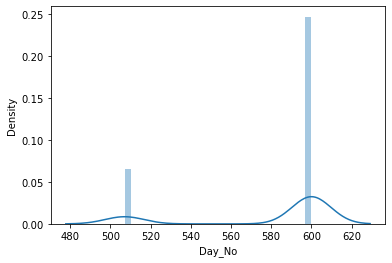

In [20]:
#will plot distribution of frequencies of DAY_NO to explore
a = df['Day_No'].value_counts()

sns.distplot(a)
#we can check for significance

### Course related variables

In [21]:
df['Course_ID'].nunique()

600

In [22]:
df['Course_ID'].value_counts()

256    882
152    882
148    882
149    882
405    882
      ... 
432    698
435    698
436    698
181    698
511    698
Name: Course_ID, Length: 600, dtype: int64

<AxesSubplot:xlabel='Course_ID', ylabel='Density'>

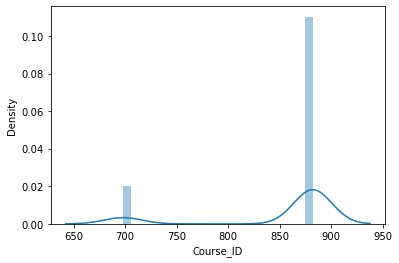

In [23]:
sns.distplot(df['Course_ID'].value_counts())
#we can check for significance

#### Course_Domain

In [24]:
df['Course_Domain'].value_counts()

Development             264295
Software Marketing      166172
Finance & Accounting     77210
Business                  4410
Name: Course_Domain, dtype: int64

<AxesSubplot:xlabel='Course_Domain', ylabel='count'>

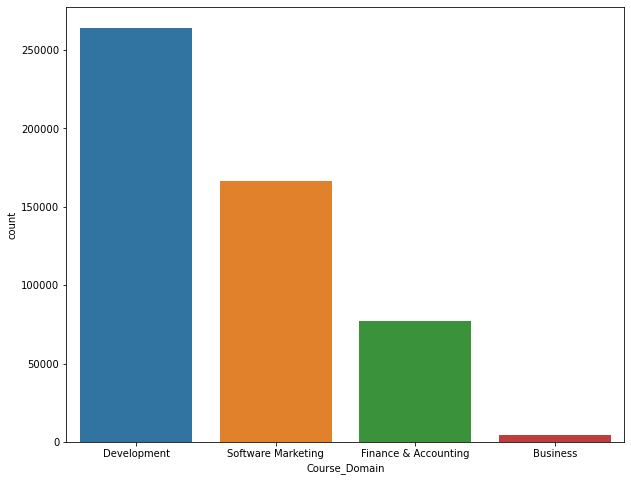

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df['Course_Domain'])

<AxesSubplot:xlabel='Course_Type', ylabel='count'>

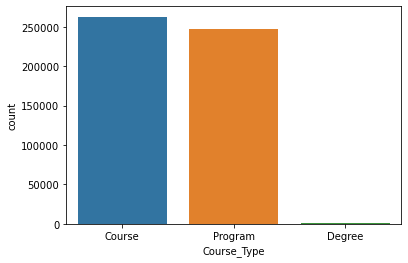

In [26]:
sns.countplot(df['Course_Type'])

### Promotion

<AxesSubplot:xlabel='Short_Promotion', ylabel='count'>

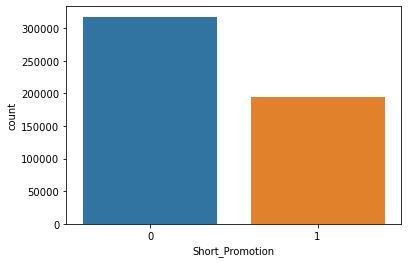

In [27]:
sns.countplot(df['Short_Promotion'])


<AxesSubplot:xlabel='Public_Holiday', ylabel='count'>

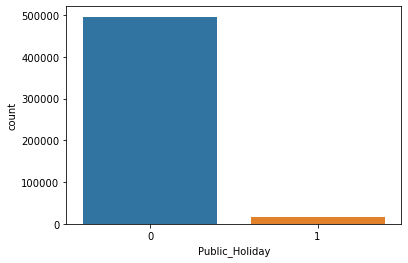

In [28]:
sns.countplot(df['Public_Holiday'])

<AxesSubplot:xlabel='Long_Promotion', ylabel='count'>

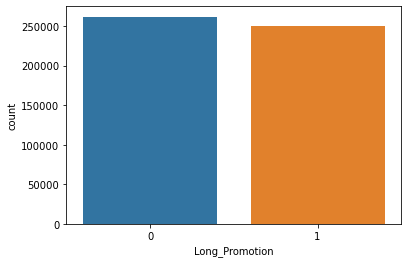

In [29]:
sns.countplot(df['Long_Promotion'])

### User Traffic

In [30]:
df['User_Traffic'].describe()

count    512087.000000
mean      15375.101198
std        7727.231205
min         168.000000
25%       10584.000000
50%       13776.000000
75%       18123.000000
max      100002.000000
Name: User_Traffic, dtype: float64

In [31]:
#Evaluation data doesnt have User_Traffic variable

<AxesSubplot:xlabel='User_Traffic', ylabel='Density'>

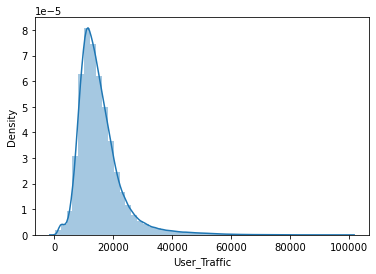

In [32]:
sns.distplot(df['User_Traffic'])

<AxesSubplot:xlabel='User_Traffic'>

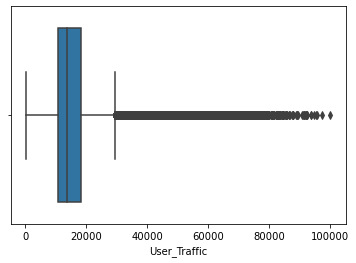

In [33]:
sns.boxplot(df['User_Traffic'])

In [34]:
#Right-skewed, Leptokurtic, Outliers are present

### Competition_Metric

In [35]:
df['Competition_Metric'].describe()

count    510323.000000
mean          0.073345
std           0.100115
min           0.000000
25%           0.010000
50%           0.035000
75%           0.094000
max           0.768000
Name: Competition_Metric, dtype: float64

<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

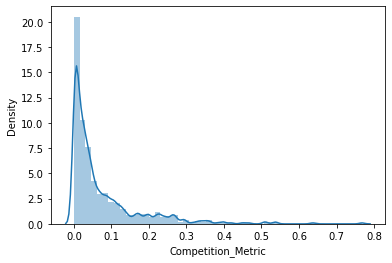

In [36]:
sns.distplot(df['Competition_Metric'])

<AxesSubplot:xlabel='Competition_Metric'>

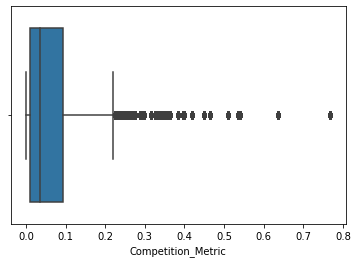

In [37]:
sns.boxplot(df['Competition_Metric'])

In [38]:
#Right-skewed, Leptokurtic, Outliers are present

In [39]:
df['Competition_Metric'].isnull().sum()

#0.03% null values are present.

1764

## Bivariate analysis

<AxesSubplot:xlabel='Sales', ylabel='User_Traffic'>

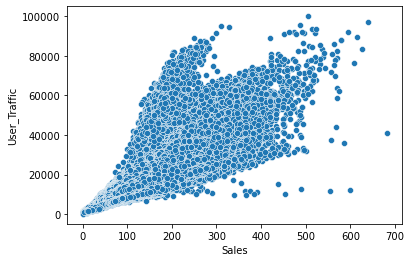

In [40]:
sns.scatterplot(df['Sales'], df['User_Traffic'])
#there is a positive relationship betwenn Sales & User_Traffic

<AxesSubplot:xlabel='Sales', ylabel='Day_No'>

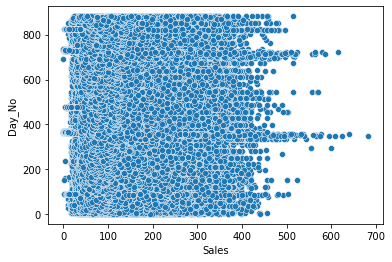

In [41]:
sns.scatterplot(df['Sales'], df['Day_No'])

#there is no signiicant relation between Sales & Day_no

In [42]:
#sns.swarmplot(df['Course_Domain'], df['Sales'])

In [43]:
#sns.pairplot(df)

In [44]:
df.columns

Index(['Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

## Statistical Analysis to find significance of variables

In [45]:
from scipy import stats

In [46]:
#to check normality of Sales

#Ho : Data is normal
#H1 : Data is not normal

stats.shapiro(df['Sales'])
#reject null, Data is not normal

ShapiroResult(statistic=0.9205013513565063, pvalue=0.0)

In [47]:
stats.spearmanr(df['Sales'], df['Day_No'])

SpearmanrResult(correlation=0.0675377440728548, pvalue=0.0)

In [48]:
stats.spearmanr(df['Sales'], df['User_Traffic'])

SpearmanrResult(correlation=0.8353295628808376, pvalue=0.0)

<AxesSubplot:>

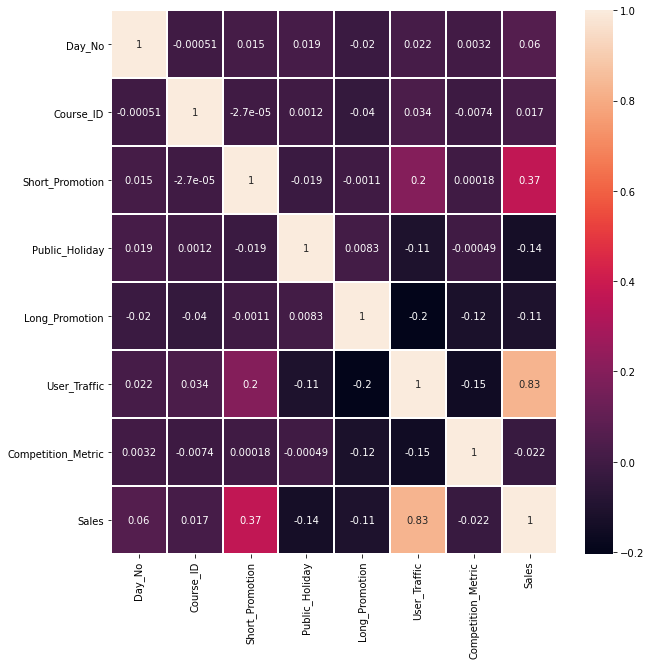

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=1, annot=True)

#User traffic is most importtant feature to predict Target

## Data preprocessing (model dataset)

In [50]:
df.columns

Index(['Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion', 'User_Traffic',
       'Competition_Metric', 'Sales'],
      dtype='object')

#### Remove outliers from Sales col

In [51]:
#there is a huge outliers, we can find out the percentage of the outliers
q1 = df['Sales'].quantile(0.25)
q3 = df['Sales'].quantile(0.75)

iqr = q3 - q1

ll = q1 - 1.5 * iqr
ul = q3 + 1.5 * iqr

df = df[((df['Sales'] > ll) & (df['Sales'] < ul))]

In [52]:
df.shape

(493380, 10)

In [53]:
df['Competition_Metric'].median()

0.035

In [54]:
com_value = df['Competition_Metric'].median()

In [55]:
df['Competition_Metric'].fillna(df['Competition_Metric'].median(), inplace=True)

In [56]:
df.isnull().sum().sum()

0

In [57]:
#encode the categorical variables
cat_col = list(df.select_dtypes(exclude='number').columns)
cat_col

['Course_Domain', 'Course_Type']

In [58]:
df = pd.get_dummies(data=df, columns=cat_col, drop_first=True)

In [59]:
df.shape

(493380, 13)

In [60]:
#split X and y

y = df['Sales']
X = df.drop('Sales', axis=1)

In [61]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train.shape, X_test.shape

((345366, 12), (148014, 12))

In [62]:
#power transform the data

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [63]:
X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

X_train.shape, X_test.shape

((345366, 12), (148014, 12))

In [64]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric',
       'Course_Domain_Development', 'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

In [65]:
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'User_Traffic', 'Competition_Metric',
       'Course_Domain_Development', 'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

## Pre-processing the evaluation data

In [66]:
df_eval.drop('ID', axis=1, inplace=True)

In [67]:
df_eval.columns

Index(['Day_No', 'Course_ID', 'Course_Domain', 'Course_Type',
       'Short_Promotion', 'Public_Holiday', 'Long_Promotion',
       'Competition_Metric'],
      dtype='object')

In [68]:
df_eval.isnull().sum()

Day_No                  0
Course_ID               0
Course_Domain           0
Course_Type             0
Short_Promotion         0
Public_Holiday          0
Long_Promotion          0
Competition_Metric    120
dtype: int64

<AxesSubplot:xlabel='Competition_Metric', ylabel='Density'>

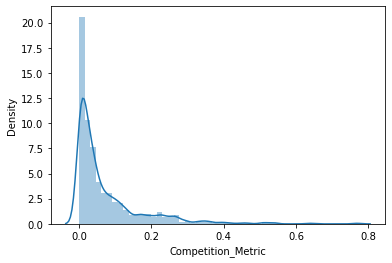

In [69]:
sns.distplot(df_eval['Competition_Metric'])

In [70]:
df_eval['Competition_Metric'].fillna(com_value, inplace=True)

In [71]:
df_eval = pd.get_dummies(data=df_eval, columns=cat_col, drop_first=True)

df_eval.shape

(36000, 11)

In [72]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.30, random_state=42)

X_train1.shape, X_test1.shape

((345366, 12), (148014, 12))

In [73]:
X_train1.drop('User_Traffic', axis=1, inplace=True)
X_test1.drop('User_Traffic', axis=1, inplace=True)

X_train1.shape, X_test1.shape

((345366, 11), (148014, 11))

In [75]:
X_train1 = pt.fit_transform(X_train1)
X_test1 = pt.transform(X_test1)

X_train1.shape, X_test1.shape

((345366, 11), (148014, 11))

In [76]:
list(X.columns).remove('User_Traffic')

In [77]:
x_col = ['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric',
       'Course_Domain_Development', 'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program']

In [78]:
X_train1 = pd.DataFrame(X_train1, columns=x_col)
X_train1.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

In [79]:
X_test1 = pd.DataFrame(X_test1, columns=x_col)
X_test1.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

In [80]:
X_train1

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,-0.167999,1.191399,-0.762850,5.462761,-0.989492,-1.243703,0.976380,-0.419975,-0.702528,-0.057243,1.046207
1,1.195586,-2.084626,-0.762850,-0.183058,-0.989492,1.855642,0.976380,-0.419975,-0.702528,-0.057243,1.046207
2,-1.250779,-0.658883,1.310874,-0.183058,-0.989492,0.784880,-1.024192,-0.419975,1.423431,-0.057243,1.046207
3,-0.395207,-1.394742,-0.762850,-0.183058,-0.989492,0.003088,0.976380,-0.419975,-0.702528,-0.057243,-0.955834
4,-0.698818,-0.370745,-0.762850,-0.183058,1.010619,0.370551,-1.024192,-0.419975,1.423431,-0.057243,1.046207
...,...,...,...,...,...,...,...,...,...,...,...
345361,0.594547,0.183209,-0.762850,-0.183058,-0.989492,-0.742947,-1.024192,2.381095,-0.702528,-0.057243,1.046207
345362,-1.840095,0.848492,-0.762850,-0.183058,1.010619,-0.867698,0.976380,-0.419975,-0.702528,-0.057243,1.046207
345363,-2.119169,-0.723021,-0.762850,-0.183058,-0.989492,-0.299800,-1.024192,2.381095,-0.702528,-0.057243,-0.955834
345364,-0.457239,-0.608355,-0.762850,-0.183058,1.010619,-1.171536,0.976380,-0.419975,-0.702528,-0.057243,-0.955834


In [81]:
df_eval

,Day_No,Course_ID,Short_Promotion,Public_Holiday,Long_Promotion,Competition_Metric,Course_Domain_Development,Course_Domain_Finance & Accounting,Course_Domain_Software Marketing,Course_Type_Degree,Course_Type_Program
0,883,1,1,0,1,0.007,1,0,0,0,0
1,884,1,1,0,1,0.007,1,0,0,0,0
2,885,1,1,0,1,0.007,1,0,0,0,0
3,886,1,1,0,1,0.007,1,0,0,0,0
4,887,1,0,0,1,0.007,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
35995,938,600,1,0,1,0.070,0,0,1,0,1
35996,939,600,1,0,1,0.070,0,0,1,0,1
35997,940,600,1,0,1,0.070,0,0,1,0,1
35998,941,600,1,0,1,0.070,0,0,1,0,1


In [82]:
df_eval = pt.transform(df_eval)

df_eval.shape

(36000, 11)

In [83]:
df_eval = pd.DataFrame(df_eval, columns=x_col)

df_eval.columns

Index(['Day_No', 'Course_ID', 'Short_Promotion', 'Public_Holiday',
       'Long_Promotion', 'Competition_Metric', 'Course_Domain_Development',
       'Course_Domain_Finance & Accounting',
       'Course_Domain_Software Marketing', 'Course_Type_Degree',
       'Course_Type_Program'],
      dtype='object')

In [84]:
df_eval_new

NameError: name 'df_eval_new' is not defined

In [ ]:
df_eval

# Model building

In [85]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [86]:
def rmse(y_test, y_test_pred):
    mse = mean_squared_error(y_test, y_test_pred)
    return mse

In [87]:
def rmsle(y_test, y_test_pred):
    msle = mean_squared_log_error(y_test, y_test_pred)
    return np.sqrt(msle)

In [ ]:
Xc = sm.add_constant(X_train)

In [ ]:
Xc

In [ ]:
model = sm.OLS(y_train, Xc).fit()

model.summary()

#all the variables are significant

### 1.Linear regression

In [88]:
lir = LinearRegression()

In [ ]:
### *with user traffic

In [ ]:
lir.fit(X_train, y_train)

y_train_pred = lir.predict(X_train)

In [ ]:
y_train [y_train < 0]

In [89]:
def posi(data):
    posi_data = []
    for i in range(len(data)):
        if data[i] < 0:
            posi_data.append(-(data[i]))
        else:
            posi_data.append(data[i])
    return pd.Series(posi_data)

In [ ]:
y_train_pred = posi(y_train_pred)

In [ ]:
y_train_pred

In [ ]:
y_train_pred [y_train_pred < 0]

In [ ]:
lir.fit(X_train, y_train)

y_train_pred = lir.predict(X_train)
rmsle(y_train, posi(y_train_pred))

In [ ]:
X_train

In [ ]:
lir.fit(X_train, y_train)

y_test_pred = lir.predict(X_test)
rmsle(y_test, posi(y_test_pred))

In [ ]:
### *without user traffic

In [ ]:
lir.fit(X_train1, y_train)

y_train_pred = lir.predict(X_train1)
rmsle(y_train, y_train_pred)

In [ ]:
y_test_pred = lir.predict(X_test1)
rmsle(y_test, y_test_pred)

#### 'User_Traffic'

In [90]:
X_train_sub = X_train.drop('User_Traffic', axis=1)
X_test_sub = X_test.drop('User_Traffic', axis=1)

In [91]:
y_train_sub = X_train[['User_Traffic']]
y_test_sub = X_test[['User_Traffic']]

In [92]:
X_train_sub.shape, y_train_sub.shape

((345366, 11), (345366, 1))

In [93]:
lir = LinearRegression()

lir.fit(X_train_sub, y_train_sub)

y_train_pred = lir.predict(X_train_sub)
rmse(y_train_sub, y_train_pred)

0.7216080207807504

In [94]:
y_test_pred = lir.predict(X_test_sub)
rmse(y_test_sub, y_test_pred)

0.7266708389469703

In [95]:
user_trafic_eval = lir.predict(df_eval)

In [96]:
df_eval_new = df_eval.copy()

In [97]:
df_eval_new['User_Traffic'] = user_trafic_eval

In [98]:
df_eval_new.shape

(36000, 12)

## Linear model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
lir = LinearRegression()

In [ ]:
cvs = cross_val_score(estimator=lir, X=X_train1, y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs

In [ ]:
SCORERS.keys()

In [ ]:
cvs.mean() * 1000

In [ ]:
np.sqrt(148.07)

In [ ]:
12.168 * 1000

In [ ]:
lir = LinearRegression()

lir.fit(X_train, y_train)
eval_sales = lir.predict(df_eval_new)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales

evaluation_df.to_csv('Basic model.csv')

In [ ]:
eval_sales[eval_sales<0]

In [ ]:
evaluation_df.index = evaluation_df.ID

In [ ]:
evaluation_df = evaluation_df.drop('ID', axis=1)
evaluation_df.to_csv('Basic model.csv')

In [ ]:
# without user traffic

lir = LinearRegression()

lir.fit(X_train1, y_train1)
eval_sales = lir.predict(df_eval)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales
evaluation_df.index = evaluation_df.ID
evaluation_df = evaluation_df.drop('ID', axis=1)

evaluation_df.to_csv('Basic model without.csv')

In [ ]:
X_test1

In [ ]:
X_full = pd.concat([X_train1, X_test1])

In [ ]:
y_full = pd.concat([y_train1, y_test1])

In [ ]:
cvs = cross_val_score(estimator=lir, X=X_full, y=y_full, scoring='neg_mean_squared_log_error', cv=10)
cvs

In [ ]:
cvs.mean()

In [ ]:
X_train1.columns

In [ ]:
cvs = cross_val_score(estimator=lir, X=X_train1, y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

In [ ]:
cvs = cross_val_score(estimator=lir, X=X_train1.drop('Competition_Metric', axis=1), y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

# 2. DTC

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train1, y_train1)

In [ ]:
y_train_pred = dtc.predict(X_train1)
rmsle(y_train1, y_train_pred)

In [ ]:
y_test_pred = dtc.predict(X_test1)
rmsle(y_test1, y_test_pred)

In [ ]:
dtc = DecisionTreeRegressor(random_state=42)
cvs = cross_val_score(estimator=dtc, X=X_train1, y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

In [ ]:
# tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import randint as sp_randint

In [ ]:


dtc = DecisionTreeRegressor(random_state=4)

params = {'max_depth' : sp_randint(2,10),
         'min_samples_leaf' : sp_randint(1,12)}

rsearch = RandomizedSearchCV(dtc, param_distributions=params, n_iter=25, n_jobs=-1, 
                             cv=3, scoring='neg_root_mean_squared_error', random_state=4)

# RandomizedSearchCV on overall transformed datasets
rsearch.fit(X_train1,y_train1)

In [ ]:
#Best parameters
print(rsearch.best_params_)

In [ ]:
dtc = DecisionTreeRegressor(**rsearch.best_params_, random_state=42)

cvs = cross_val_score(estimator=dtc, X=X_train1, y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

In [ ]:
dtc = DecisionTreeRegressor()
dtc.fit(X_train1, y_train1)

eval_sales = dtc.predict(df_eval)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales
evaluation_df.index = evaluation_df.ID
evaluation_df = evaluation_df.drop('ID', axis=1)

evaluation_df.to_csv('DTC without tuning.csv')

# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr = RandomForestRegressor(random_state=4)
rfr.fit(X_train1, y_train1)

In [ ]:
y_train_pred = rfr.predict(X_train1)
rmsle(y_train1, y_train_pred)

In [ ]:
y_test_pred = rfr.predict(X_test1)
rmsle(y_test1, y_test_pred)

In [ ]:
rfr = RandomForestRegressor(random_state=4)
cvs = cross_val_score(estimator=rfr, X=X_train1, y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

In [ ]:
#tuning

In [ ]:
rfr = RandomForestRegressor(random_state=4)


params = {'n_estimators': sp_randint(50,200),
         'max_features': sp_randint(1,15),
         'min_samples_leaf' : sp_randint(1,25),
          'max_depth' : sp_randint(1,10)}

rsearch = RandomizedSearchCV(rfr, param_distributions=params, cv=3, n_iter=30, verbose=2, 
                             scoring='neg_root_mean_squared_error', random_state=4, n_jobs=-1)
rsearch.fit(X_train1,y_train1)



In [ ]:
#Best parameters
print(rsearch.best_params_)

In [ ]:
rfr = RandomForestRegressor(**rsearch.best_params_, random_state=4)


cvs = cross_val_score(estimator=rfr, X=X_train1, y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

In [ ]:
rfr = RandomForestRegressor(random_state=4)
rfr.fit(X_train1, y_train1)


In [ ]:

eval_sales = rfr.predict(df_eval)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales
evaluation_df.index = evaluation_df.ID
evaluation_df = evaluation_df.drop('ID', axis=1)

evaluation_df.to_csv('RFC without tuning.csv')

# LGBMClassifier

In [ ]:
pip install lightgbm

In [ ]:
import lightgbm as lgb

In [ ]:
lgbc = lgb.LGBMRegressor()
lgbc.fit(X_train, y_train)

In [ ]:
y_train_pred = lgbc.predict(X_train)
rmsle(y_train, posi(y_train_pred))

In [ ]:
y_test_pred = lgbc.predict(X_test)
rmsle(y_test, posi(y_test_pred))

In [ ]:
y_train_pred[y_train_pred<0]

In [ ]:
cvs = cross_val_score(estimator=lgbc, X=X_train1, y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

In [ ]:
cvs = cross_val_score(estimator=lgbc, X=X_train, y=y_train, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

In [ ]:
lgbc = lgb.LGBMRegressor()
lgbc.fit(X_train1, y_train1)


eval_sales = lgbc.predict(df_eval)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales
evaluation_df.index = evaluation_df.ID
evaluation_df = evaluation_df.drop('ID', axis=1)

evaluation_df.to_csv('LGBC without tuning.csv')

In [ ]:
eval_sales[eval_sales<0]

In [ ]:
#tuning

In [ ]:
from scipy.stats import uniform as sp_uniform

In [ ]:
lgbc = lgb.LGBMRegressor()

params = {'n_estimators':sp_randint(50,250),
         'max_depth' : sp_randint(1,50),
         'learning_rate' : sp_uniform(0,0.5)}

rsearch = RandomizedSearchCV(lgbc, param_distributions=params, scoring='neg_mean_squared_log_error', cv=3, n_iter=50,
                             n_jobs=-1, random_state=4)
rsearch.fit(X_train1, y_train1)

In [ ]:
print(rsearch.best_params_)

In [ ]:
lgbc = lgb.LGBMRegressor(**rsearch.best_params_, random_state=4)
lgbc.fit(X_train1, y_train1)

In [ ]:
y_train_pred = lgbc.predict(X_train1)
rmsle(y_train, posi(y_train_pred))

In [ ]:
y_test_pred = lgbc.predict(X_test1)
rmsle(y_test, posi(y_test_pred))

In [ ]:
lgbc = lgb.LGBMRegressor(**rsearch.best_params_, random_state=4)

cvs = cross_val_score(estimator=lgbc, X=X_train1, y=y_train1, scoring='neg_mean_squared_log_error', cv=10)
cvs.mean()

In [ ]:
lgbc = lgb.LGBMRegressor(**rsearch.best_params_, random_state=4)
lgbc.fit(X_train1, y_train1)


eval_sales = lgbc.predict(df_eval)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales
evaluation_df.index = evaluation_df.ID
evaluation_df = evaluation_df.drop('ID', axis=1)

evaluation_df.to_csv('LGBC tuning.csv')

# XGBOOST

In [99]:

from xgboost import XGBRegressor


In [ ]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
model.fit(X_train1, y_train1)


In [ ]:
y_train_pred = model.predict(X_train1)
rmsle(y_train, posi(y_train_pred))

In [ ]:
y_test_pred = lgbc.predict(X_test1)
rmsle(y_test, posi(y_test_pred))

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
rmsle(y_train, posi(y_train_pred))

In [ ]:
y_test_pred = model.predict(X_test)
rmsle(y_test, posi(y_test_pred))

In [ ]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

model.fit(X_train1, y_train1)

eval_sales = model.predict(df_eval)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales
evaluation_df.index = evaluation_df.ID
evaluation_df = evaluation_df.drop('ID', axis=1)

evaluation_df.to_csv('XGBOOST.csv')

In [ ]:
#tuning

In [ ]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

param_dist = {"max_depth": [5, 10, 15, 30, 50],
              "n_estimators": [100, 200, 300],
              "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.3],
             "reg_alpha": [0, 0.01, 0.1, 1, 10],
             "reg_lambda": [0, 0.01, 0.1, 1, 10]}

grid_search = RandomizedSearchCV(model, param_dist, cv = 3, n_iter = 50,  
                                   verbose=10, n_jobs=-1, scoring = "f1")

grid_search.fit(X_train1, y_train1)

In [100]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(X_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=10, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [101]:
y_train_pred = model.predict(X_train1)
rmsle(y_train, posi(y_train_pred))


0.1367375051404298

In [102]:
rmse(y_train, y_train_pred)

132.90620515113375

In [104]:
y_test_pred = model.predict(X_test1)
rmsle(y_test, posi(y_test_pred))

rmse(y_test, y_test_pred)

205.8661655066018

In [105]:
rmsle(y_test, posi(y_test_pred))

0.16574361696729303

In [106]:
eval_sales = model.predict(df_eval)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales
evaluation_df.index = evaluation_df.ID
evaluation_df = evaluation_df.drop('ID', axis=1)

evaluation_df.to_csv('XGBOOST final.csv')

In [107]:
rfc = pd.read_csv('RFC without tuning.csv')
rfc

,ID,Sales
0,883,113.76
1,884,113.76
2,885,113.76
3,886,113.76
4,887,81.75
...,...,...
35995,548083,145.01
35996,548084,145.01
35997,548085,145.01
35998,548086,145.01


In [109]:
rfc['Sales'] - eval_sales

0        -6.571848
1        -6.571848
2        -6.571848
3        -6.571848
4        16.524788
           ...    
35995   -11.130518
35996   -11.130518
35997   -11.130518
35998   -11.130518
35999   -11.130518
Name: Sales, Length: 36000, dtype: float64

In [116]:
model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=1,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0500000007, max_delta_step=0, max_depth=2,
             min_child_weight=10, missing=np.nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

model.fit(X_train1, y_train1)




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.05, gamma=1,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.0500000007, max_delta_step=0, max_depth=2,
             min_child_weight=10, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [117]:
eval_sales = model.predict(df_eval)
evaluation_df = copy_df_eval[['ID']]

evaluation_df['Sales'] = eval_sales
evaluation_df.index = evaluation_df.ID
evaluation_df = evaluation_df.drop('ID', axis=1)

evaluation_df.to_csv('XGBOOST final.csv')